#1) Prepare a classification model using Naive Bayes for salary data

#Data Description:

#age -- age of a person
#workclass	-- A work class is a grouping of work
#education	-- Education of an individuals
#maritalstatus -- Marital status of an individulas
#occupation	 -- occupation of an individuals
#relationship --
#race --  Race of an Individual
#sex --  Gender of an Individual
#capitalgain --  profit received from the sale of an investment
#capitalloss	-- A decrease in the value of a capital asset
#hoursperweek -- number of hours work per week
#native -- Native of an individual
#Salary -- salary of an individual


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale,normalize
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.metrics import ConfusionMatrixDisplay
#from sklearn.metrics import plot_confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [1]:
from google.colab import files
uploaded = files.upload()

Saving SalaryData_Train.csv to SalaryData_Train.csv


In [4]:
s_train = pd.read_csv('SalaryData_Train.csv')

In [5]:
s_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
s_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [7]:
s_train.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [8]:
s_train.shape

(30161, 14)

In [9]:
s_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [10]:
s_train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [11]:
s_train.value_counts('Salary')

Salary
 <=50K    22653
 >50K      7508
dtype: int64

In [12]:
# find categorical variables

categorical = [var for var in s_train.columns if s_train[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']


In [13]:
# check missing values in categorical variables
s_train[categorical].isnull().sum()

workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
native           0
Salary           0
dtype: int64

In [14]:
# view frequency counts of values in categorical variables

for var in categorical:

    print(s_train[var].value_counts())

 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64
 HS-grad         9840
 Some-college    6677
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64
 Married-civ-spouse       14065
 Never-married             9725
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: maritalstatus, dtype: int64
 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other

In [15]:
# view frequency distribution of categorical variables

for var in categorical:

    print(s_train[var].value_counts()/np.float(len(s_train)))

 Private             0.738868
 Self-emp-not-inc    0.082855
 Local-gov           0.068532
 State-gov           0.042406
 Self-emp-inc        0.035609
 Federal-gov         0.031266
 Without-pay         0.000464
Name: workclass, dtype: float64
 HS-grad         0.326249
 Some-college    0.221379
 Bachelors       0.167236
 Masters         0.053944
 Assoc-voc       0.043334
 11th            0.034747
 Assoc-acdm      0.033421
 10th            0.027187
 7th-8th         0.018468
 Prof-school     0.017970
 9th             0.015086
 12th            0.012500
 Doctorate       0.012433
 5th-6th         0.009549
 1st-4th         0.005006
 Preschool       0.001492
Name: education, dtype: float64
 Married-civ-spouse       0.466331
 Never-married            0.322436
 Divorced                 0.139717
 Separated                0.031133
 Widowed                  0.027420
 Married-spouse-absent    0.012267
 Married-AF-spouse        0.000696
Name: maritalstatus, dtype: float64
 Prof-specialty       0.13388

In [16]:
from google.colab import files
uploaded = files.upload()

Saving SalaryData_Test.csv to SalaryData_Test.csv


In [17]:
s_test = pd.read_csv('SalaryData_Test.csv')
s_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [18]:
s_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [19]:
s_test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [20]:
string_columns=['workclass','education','maritalstatus','occupation','relationship','race','sex','native']

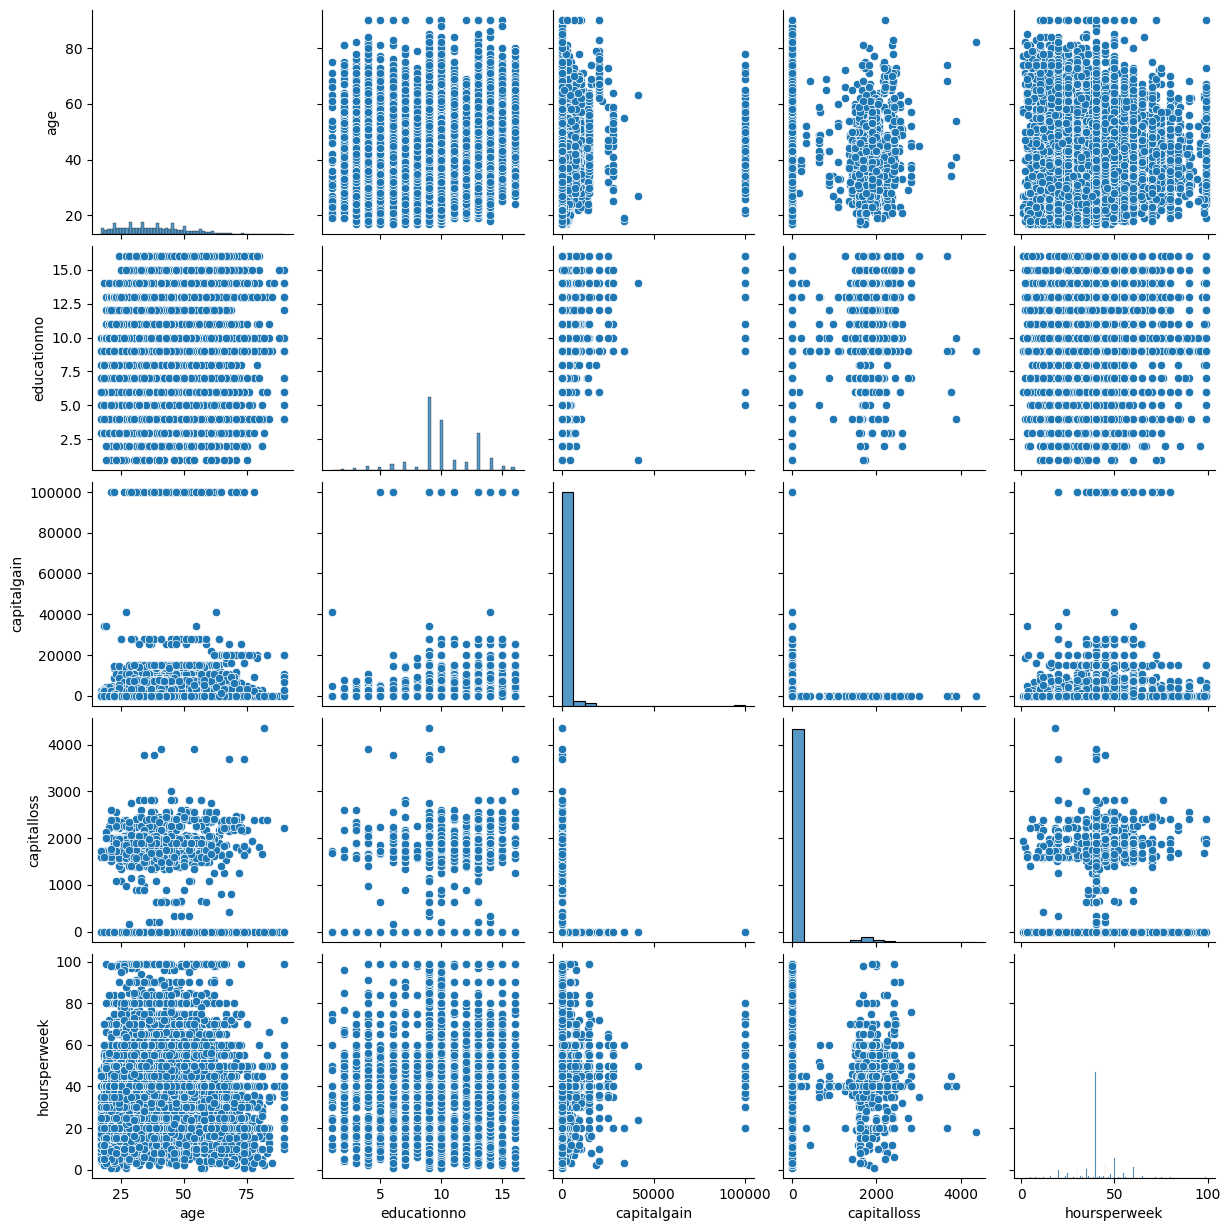

In [21]:
#Graphical Visualization

sns.pairplot(s_train)

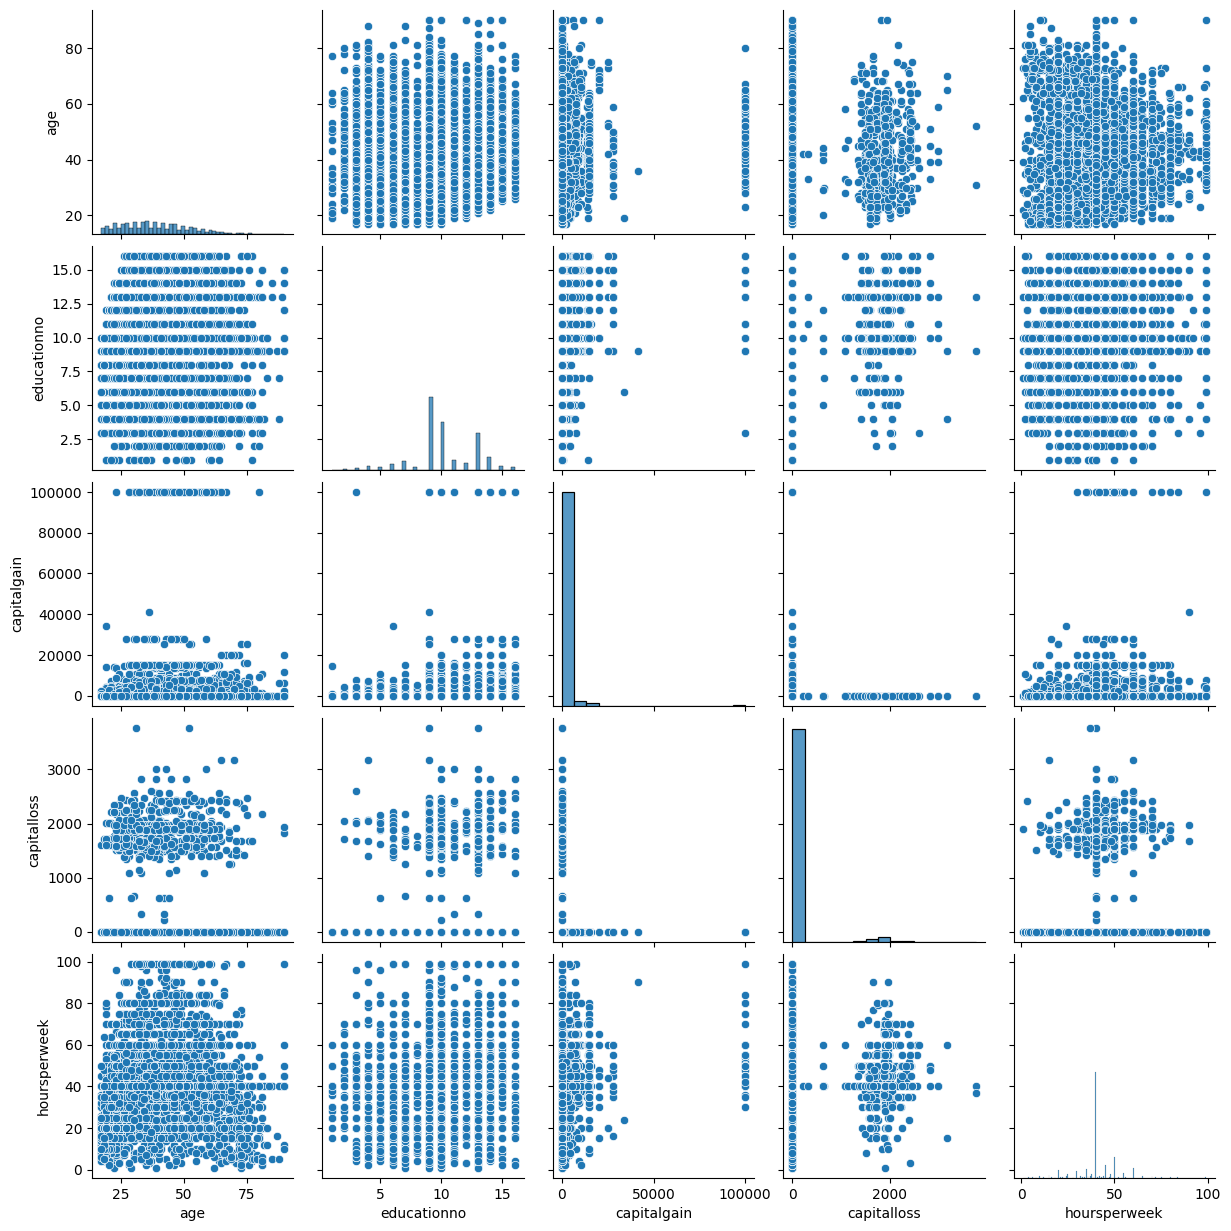

In [22]:
sns.pairplot(s_test)

<Axes: xlabel='Salary', ylabel='capitalgain'>

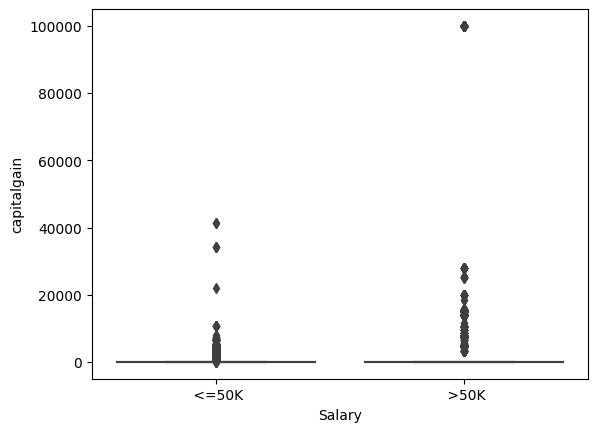

In [23]:
sns.boxplot(x=s_train['Salary'], y=s_train['capitalgain'])

<Axes: xlabel='Salary', ylabel='capitalgain'>

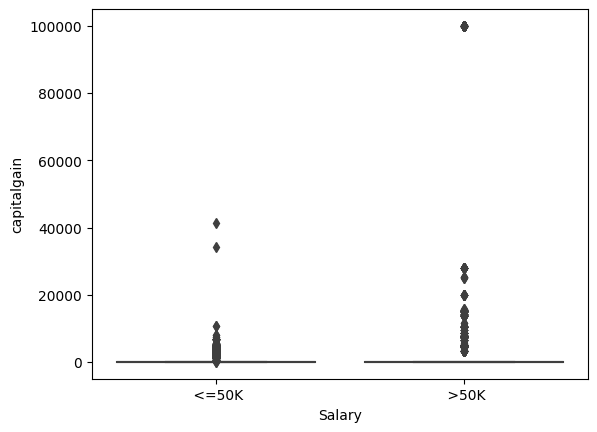

In [24]:
sns.boxplot(x=s_test['Salary'], y=s_test['capitalgain'])

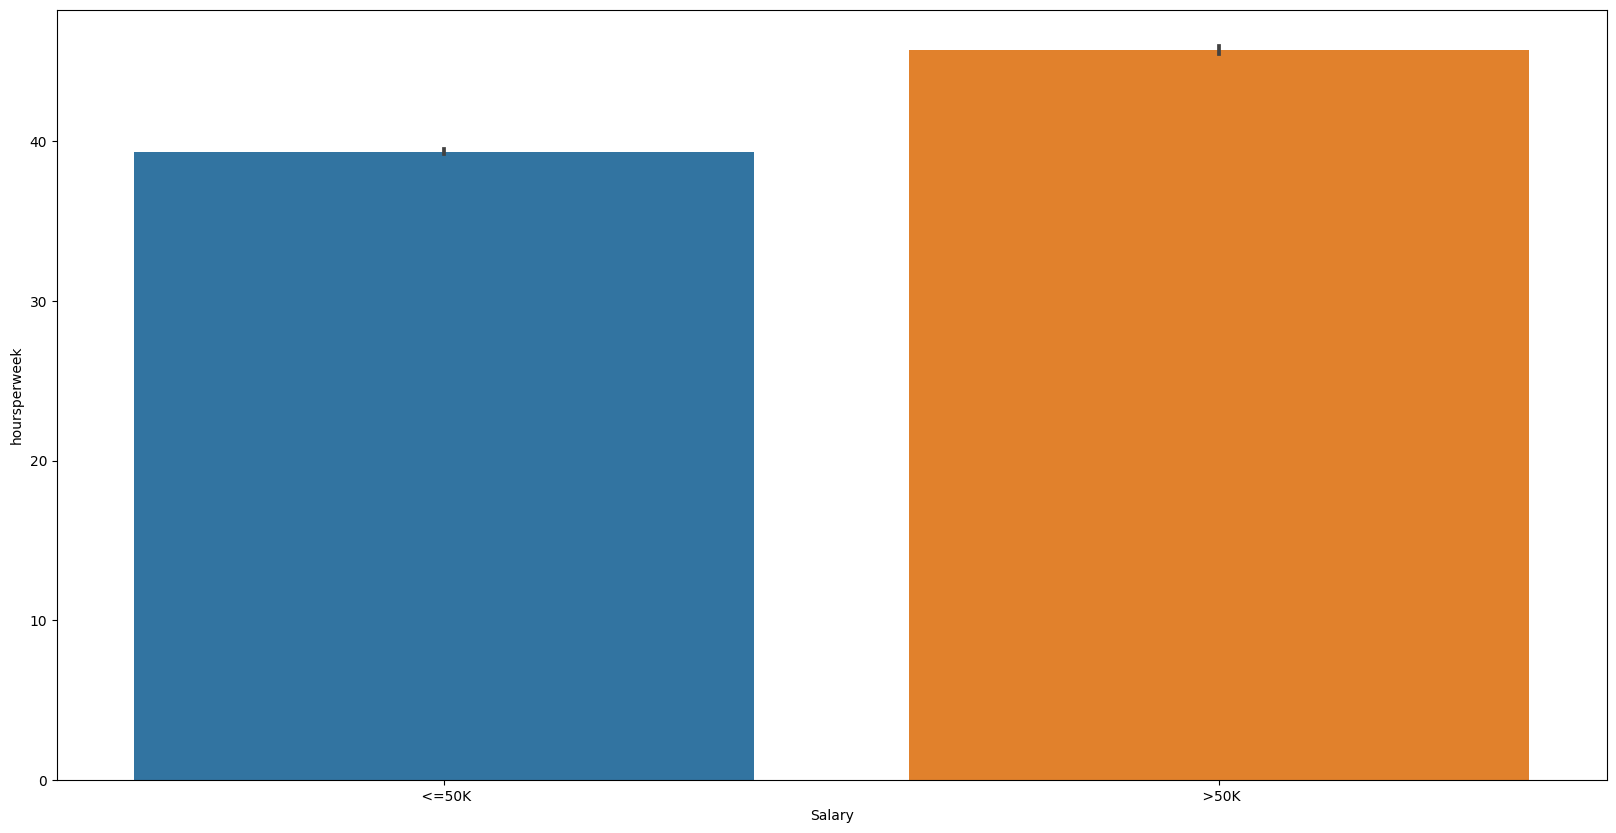

In [25]:
plt.figure(figsize=(20,10))
sns.barplot(x= s_train['Salary'], y=s_train['hoursperweek'])
plt.show()

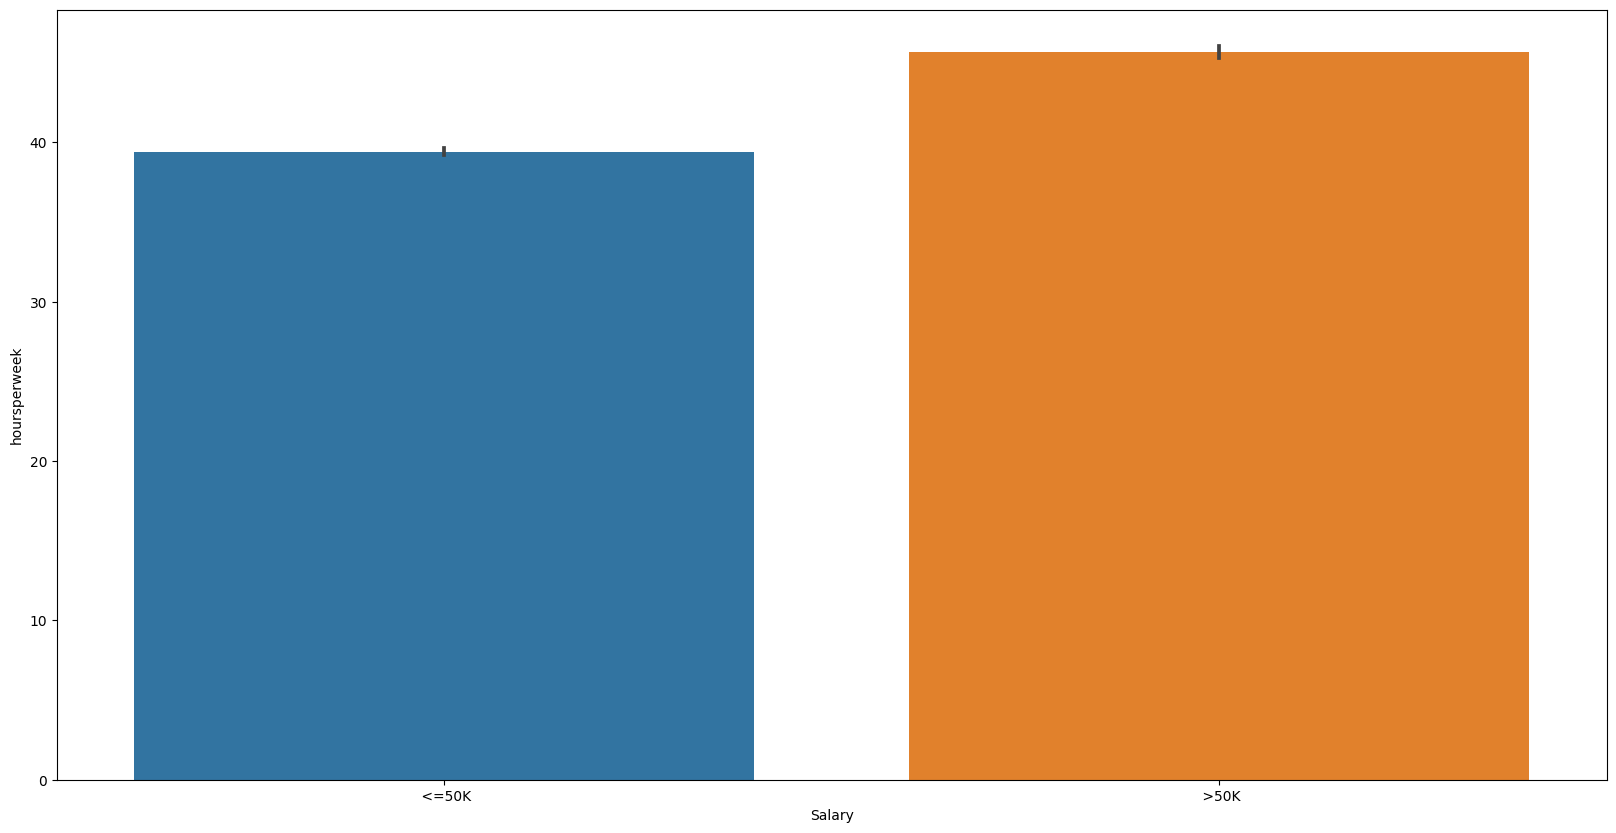

In [26]:
plt.figure(figsize=(20,10))
sns.barplot(x='Salary', y='hoursperweek', data=s_test)
plt.show()

<Figure size 1500x1000 with 0 Axes>

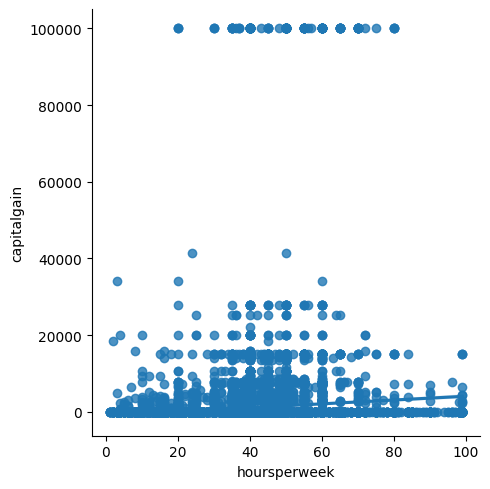

In [27]:
plt.figure(figsize=(15,10))
sns.lmplot(y='capitalgain', x='hoursperweek',data=s_train)
plt.show()

<Figure size 1500x1000 with 0 Axes>

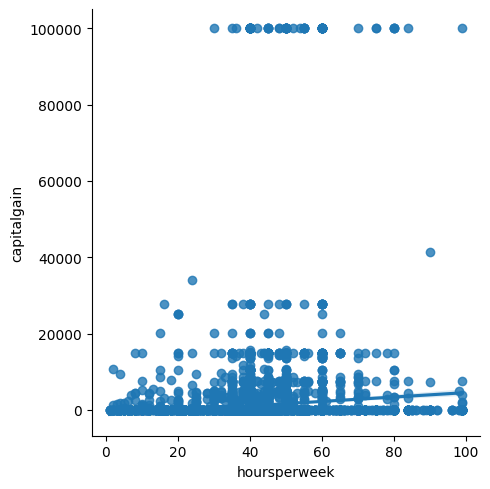

In [28]:
plt.figure(figsize=(15,10))
sns.lmplot(y='capitalgain', x='hoursperweek',data=s_test)
plt.show()

<Axes: ylabel='Salary'>

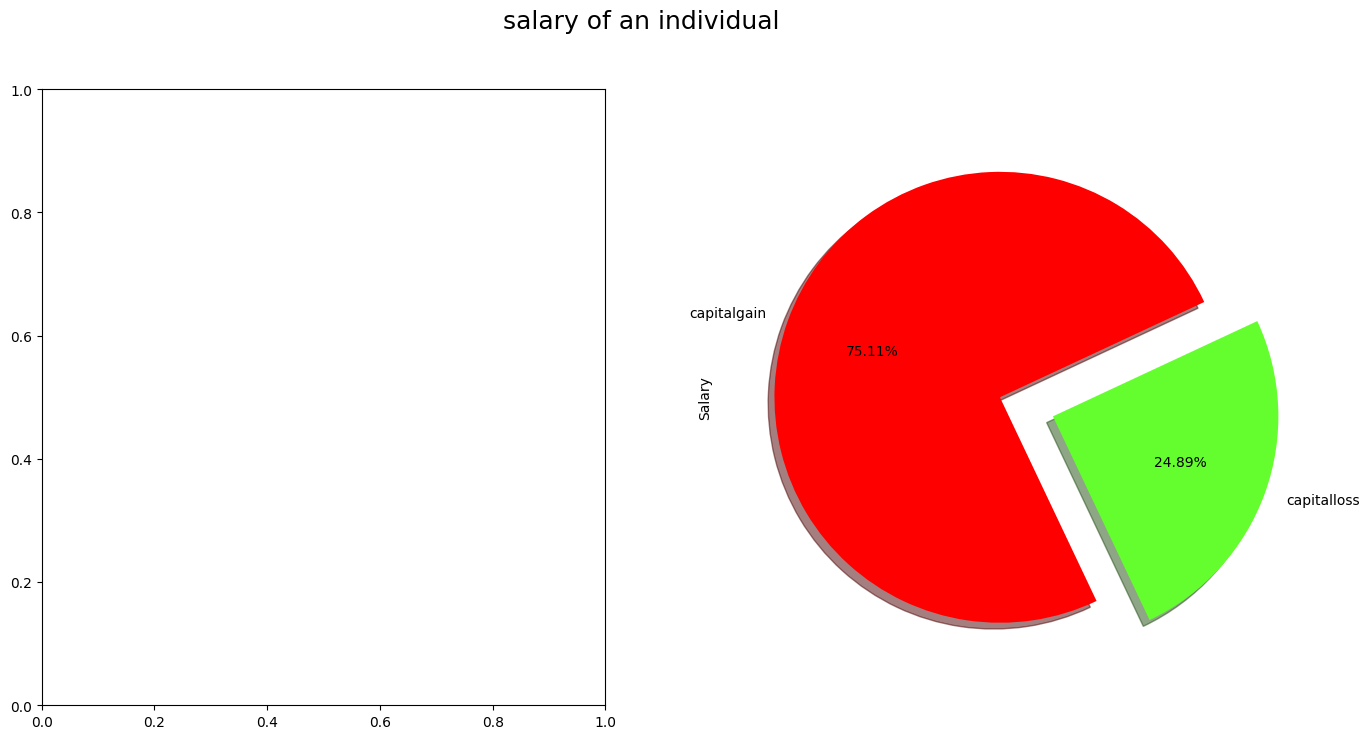

In [29]:
plt.subplots(1,2, figsize=(16,8))

colors = ["#FF0000", "#64FE2E"]
labels ="capitalgain", "capitalloss"

plt.suptitle('salary of an individual', fontsize=18)

s_train["Salary"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', shadow=True, colors=colors,
                                             labels=labels, fontsize=10, startangle=25)

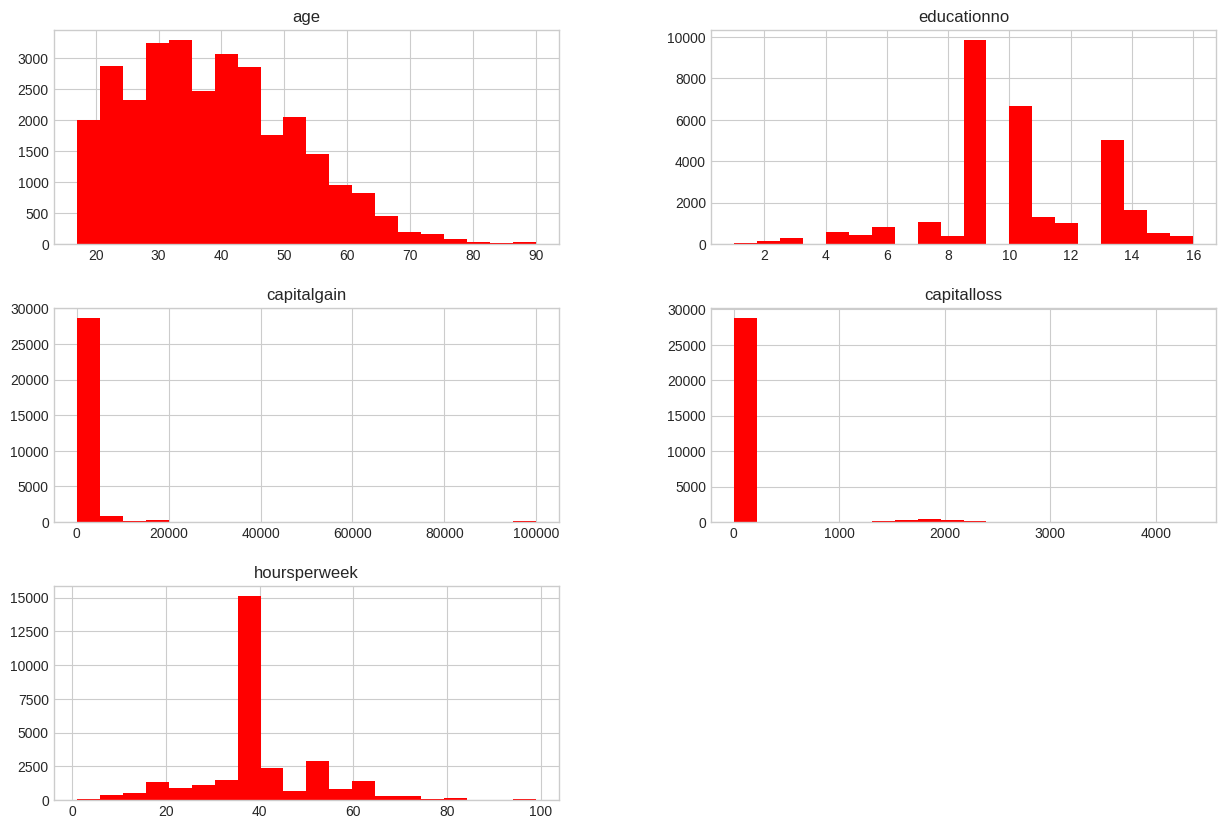

In [30]:
plt.style.use('seaborn-whitegrid')

s_train.hist(bins=20, figsize=(15,10), color='red')
plt.show()

<Axes: ylabel='Salary'>

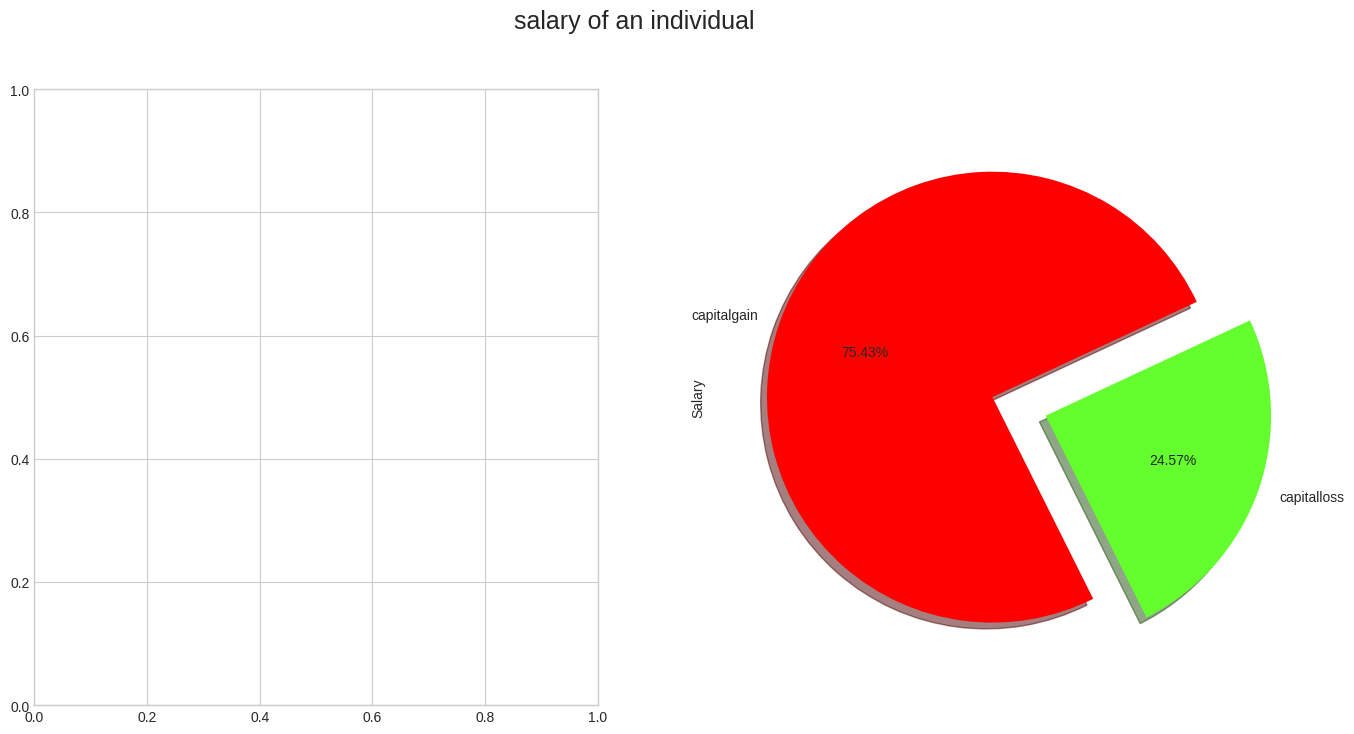

In [31]:
plt.subplots(1,2, figsize=(16,8))

colors = ["#FF0000", "#64FE2E"]
labels ="capitalgain", "capitalloss"

plt.suptitle('salary of an individual', fontsize=18)

s_test["Salary"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', shadow=True, colors=colors,
                                             labels=labels, fontsize=10, startangle=25)

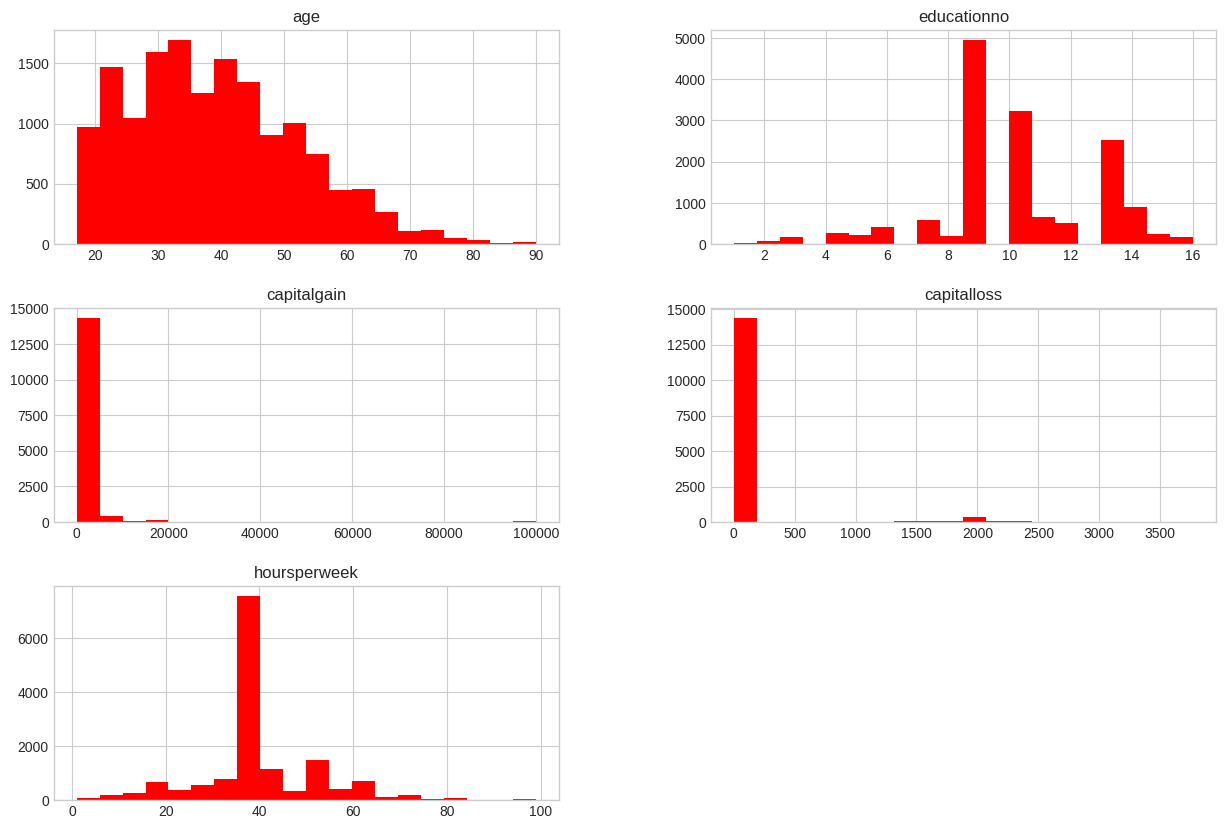

In [32]:
plt.style.use('seaborn-whitegrid')

s_test.hist(bins=20, figsize=(15,10), color='red')
plt.show()

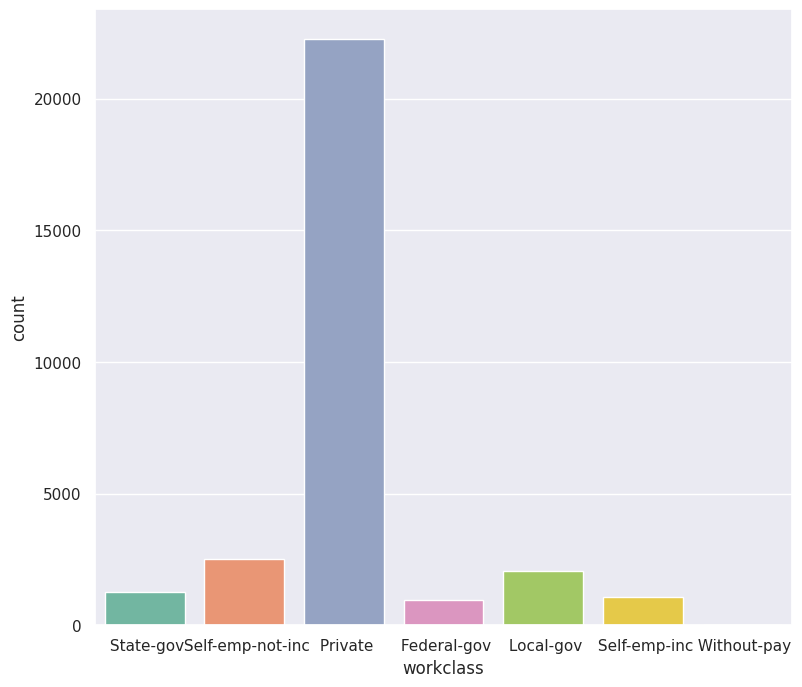

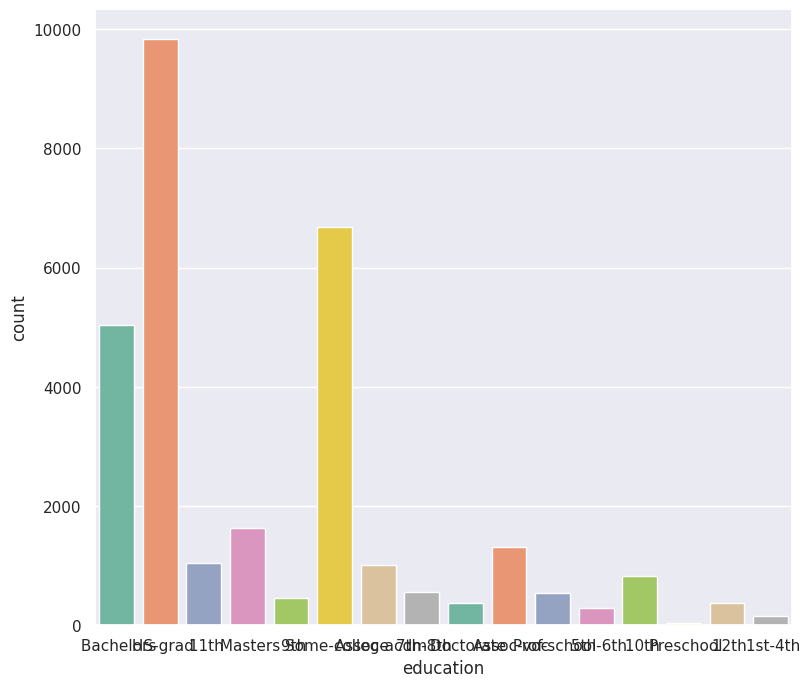

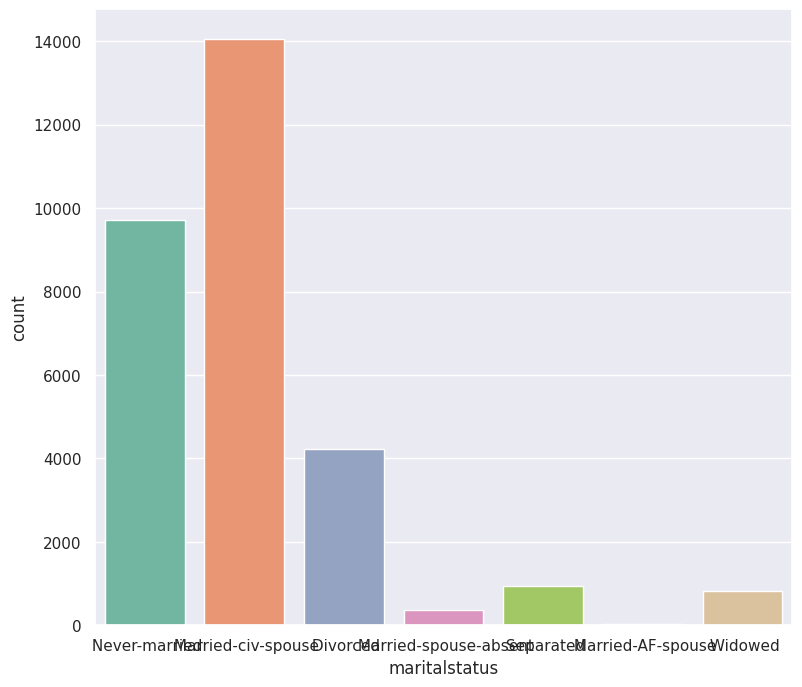

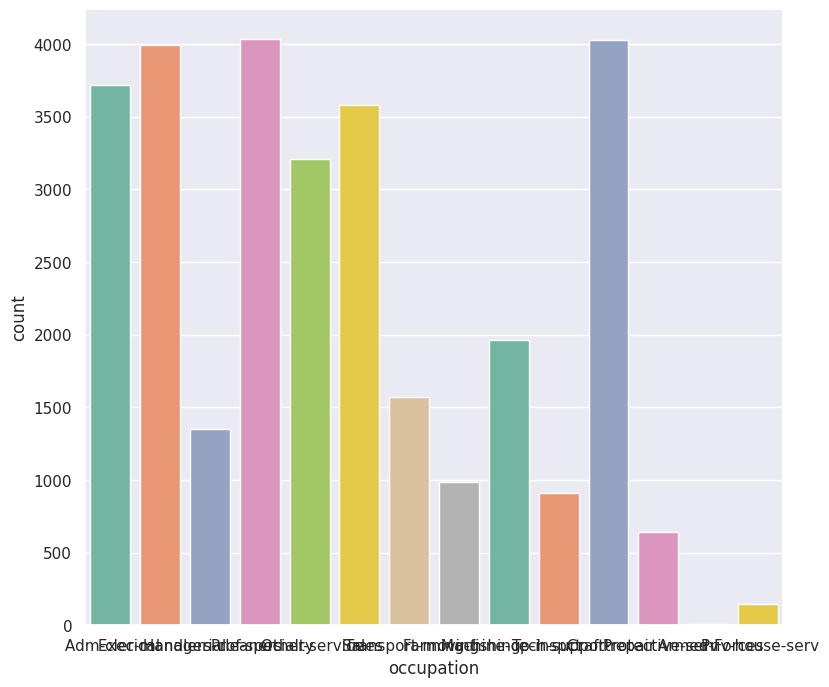

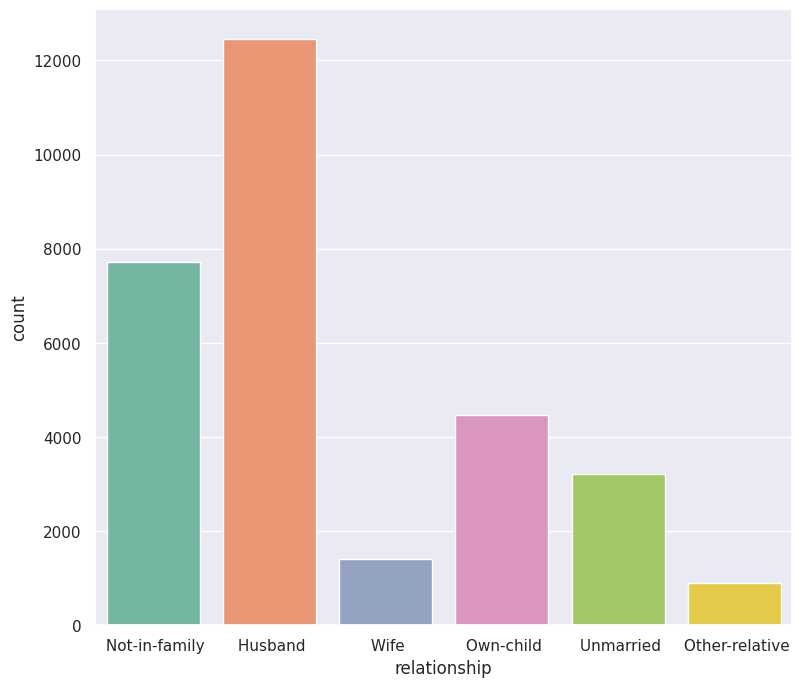

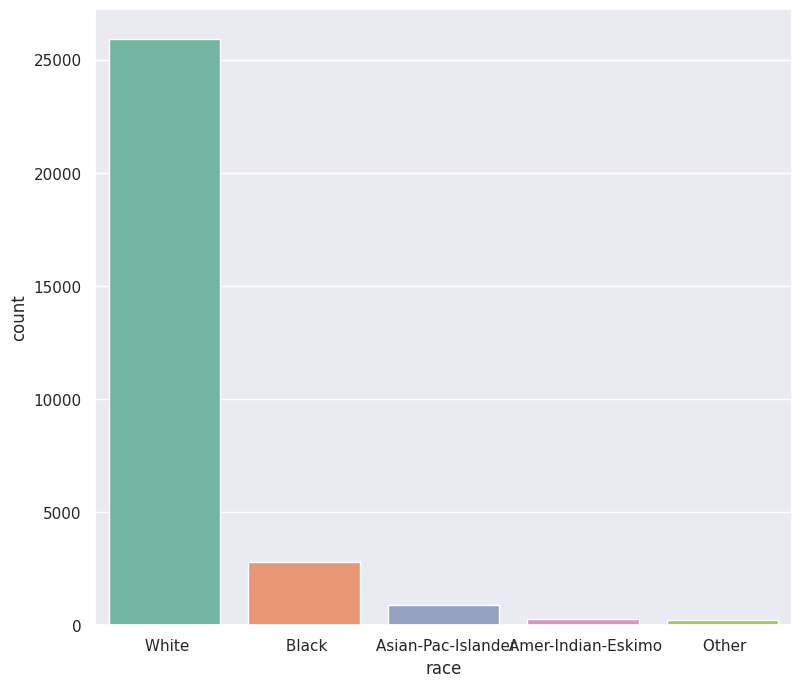

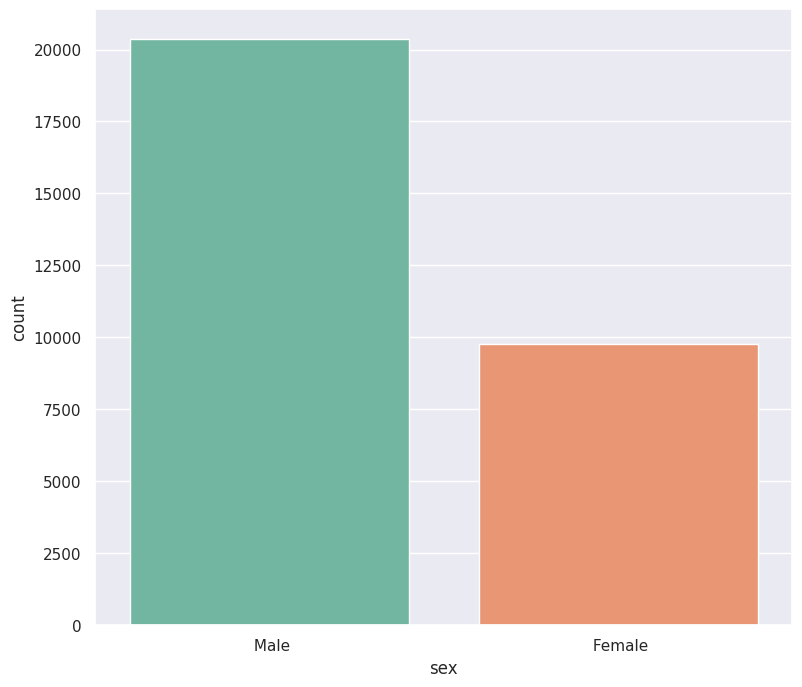

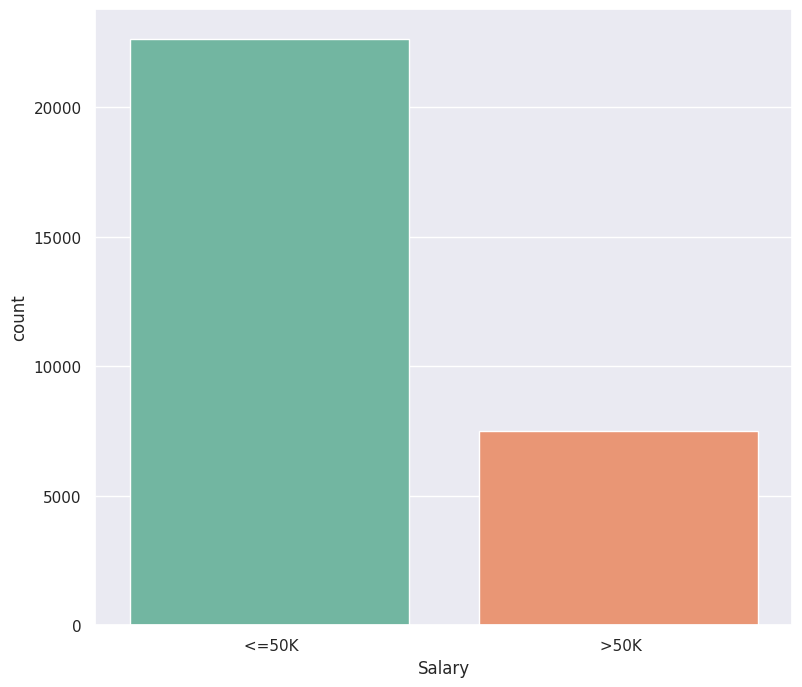

In [35]:
# countplot for all categorical columns
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(9,8)})
cat_col = ['workclass', 'education','maritalstatus', 'occupation', 'relationship', 'race', 'sex','Salary']
for col in cat_col:
    plt.figure() #this creates a new figure on which your plot will appear
    sns.countplot(x = col, data = s_train, palette = 'Set2');

<Axes: >

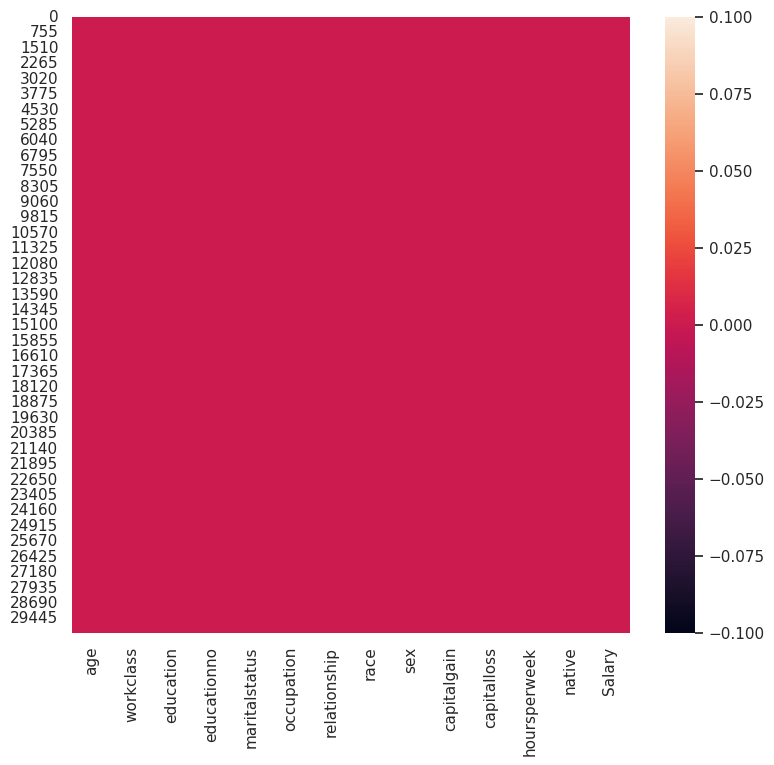

In [36]:
import seaborn as sns
sns.heatmap(s_train.isnull())

In [37]:
#Printing unique values from each categorical columns
print('workclass',s_train.workclass.unique())
print('education',s_train.education.unique())
print('maritalstatus',s_train['maritalstatus'].unique())
print('occupation',s_train.occupation.unique())
print('relationship',s_train.relationship.unique())
print('race',s_train.race.unique())
print('sex',s_train.sex.unique())
print('native',s_train['native'].unique())
print('Salary',s_train.Salary.unique())

workclass [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay']
education [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th']
maritalstatus [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Transport-moving' ' Farming-fishing'
 ' Machine-op-inspct' ' Tech-support' ' Craft-repair' ' Protective-serv'
 ' Armed-Forces' ' Priv-house-serv']
relationship [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
race [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
sex [' Male' ' Female']
native [' United-States' ' Cuba' ' Jamaica' ' India' ' Mexico' ' Puerto-Rico'
 ' Honduras

In [38]:
s_train[['Salary', 'age']].groupby(['Salary'], as_index=False).mean().sort_values(by='age', ascending=False)

,Salary,age
1,>50K,43.959110
0,<=50K,36.608264


<Axes: xlabel='race', ylabel='prop'>

<Figure size 2000x1000 with 0 Axes>

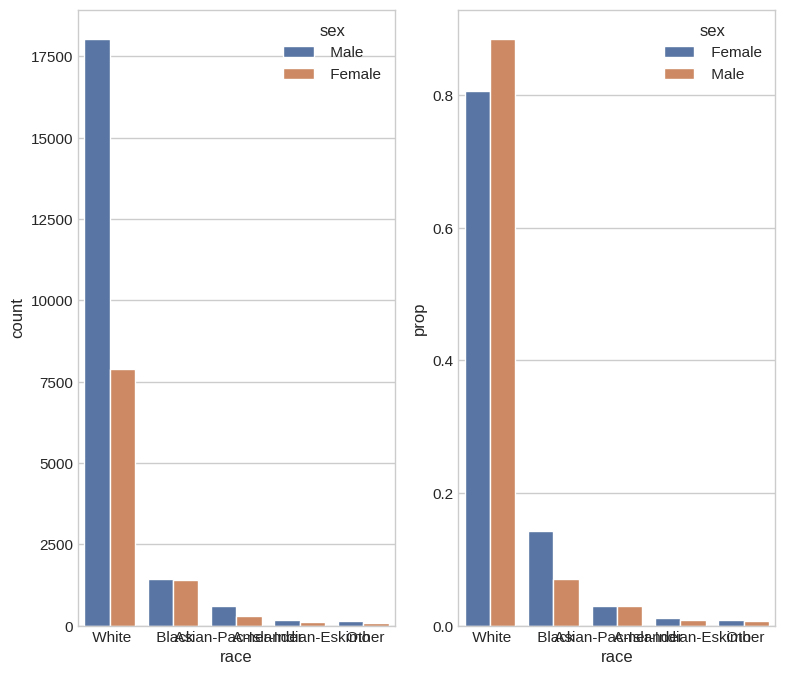

In [39]:
plt.style.use('seaborn-whitegrid')
x, y, hue = "race", "prop", "sex"
#hue_order = ["Male", "Female"]
plt.figure(figsize=(20,10))
f, axes = plt.subplots(1, 2)
sns.countplot(x=x, hue=hue, data=s_train, ax=axes[0])

prop_df = (s_train[x]
           .groupby(s_train[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df, ax=axes[1])

In [41]:
pip install pylipid --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 8.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 13.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 17.7 MB/s eta 0:00:00
  Created wheel for mdtraj: filename=mdtraj-1.9.9-cp310-cp310-linux_x86_64.whl size=7547247 sha256=bdf2872e02c5786126b7c86783c5b7cdf4ea619568281dd630de7eadfee17d3e
  Stored in directory: /root/.cache/pip/wheels/4b/4e/d5/22b44e04aca0780281ffb43717ebb3404bc1a77cf8

<Axes: xlabel='age', ylabel='hoursperweek'>

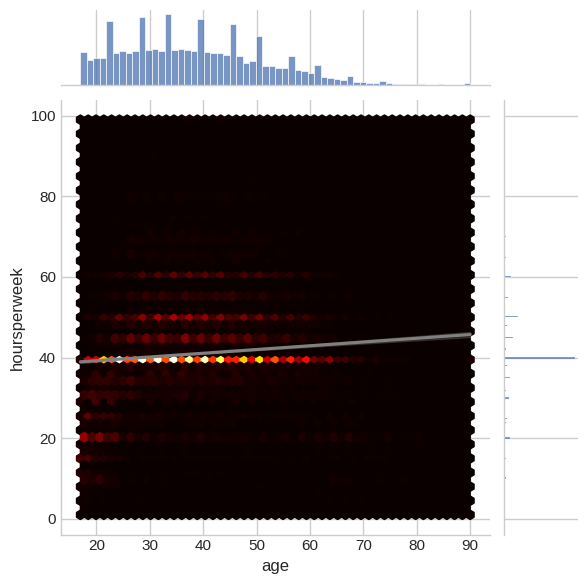

In [44]:
g = sns.jointplot(x = 'age', y = 'hoursperweek',data = s_train,kind = 'hex',cmap= 'hot')

#http://stackoverflow.com/questions/33288830/how-to-plot-regression-line-on-hexbins-with-seaborn
sns.regplot(x=s_train.age, y=s_train['hoursperweek'], ax=g.ax_joint, scatter=False, color='grey')

In [45]:
pd.crosstab(s_train['occupation'],s_train['Salary'])

Salary,<=50K,>50K
occupation,,
Adm-clerical,3223,498
Armed-Forces,8,1
Craft-repair,3122,908
Exec-managerial,2055,1937
Farming-fishing,874,115
Handlers-cleaners,1267,83
Machine-op-inspct,1720,245
Other-service,3080,132
Priv-house-serv,142,1


In [46]:
pd.crosstab(s_train['workclass'],s_train['Salary'])

Salary,<=50K,>50K
workclass,,
Federal-gov,578,365
Local-gov,1458,609
Private,17409,4876
Self-emp-inc,474,600
Self-emp-not-inc,1785,714
State-gov,935,344
Without-pay,14,0


In [48]:
pd.crosstab(s_train['workclass'],s_train['occupation'])

occupation,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
workclass,,,,,,,,,,,,,,
Federal-gov,316,9,63,179,8,22,14,34,0,167,27,14,66,24
Local-gov,281,0,143,212,29,46,11,189,0,692,304,7,38,115
Private,2793,0,3146,2647,450,1255,1881,2665,143,2254,186,2895,723,1247
Self-emp-inc,28,0,99,385,51,2,10,27,0,157,5,281,3,26
Self-emp-not-inc,49,0,523,383,430,15,35,173,0,365,6,376,26,118
State-gov,251,0,55,186,15,9,13,123,0,403,116,11,56,41
Without-pay,3,0,1,0,6,1,1,1,0,0,0,0,0,1


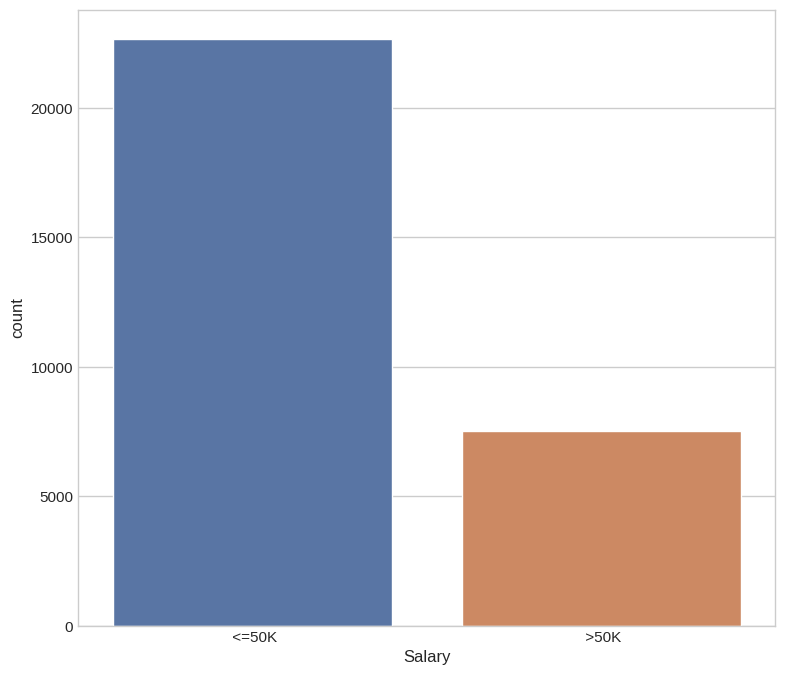

 <=50K    22653
 >50K      7508
Name: Salary, dtype: int64

In [51]:
sns.countplot(x='Salary',data= s_train)
plt.xlabel('Salary')
plt.ylabel('count')
plt.show()
s_train['Salary'].value_counts()

<Axes: xlabel='occupation', ylabel='workclass'>

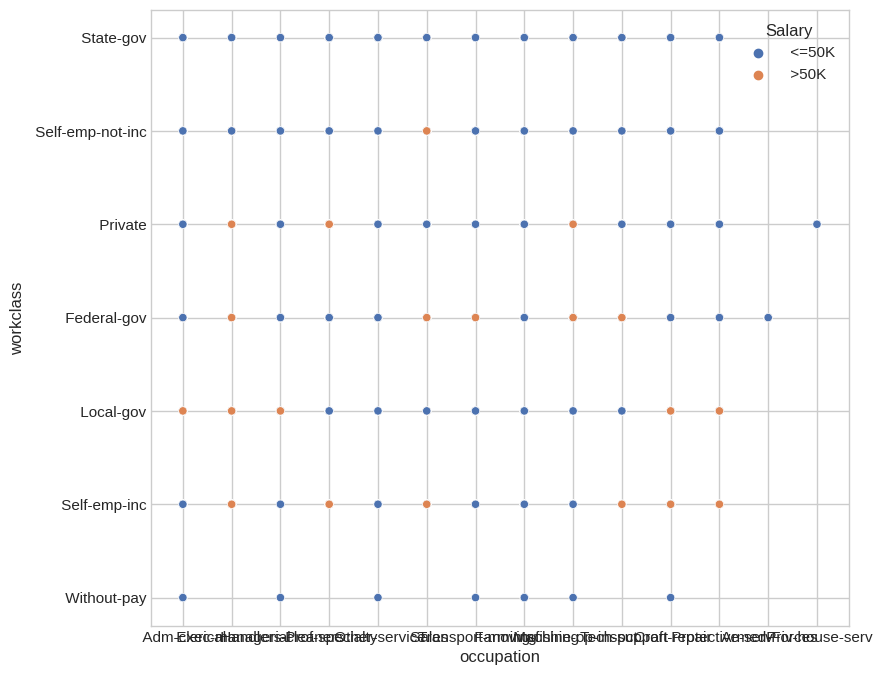

In [53]:
sns.scatterplot(x=s_train['occupation'],y=s_train['workclass'],hue=s_train['Salary'])

<Axes: xlabel='education'>

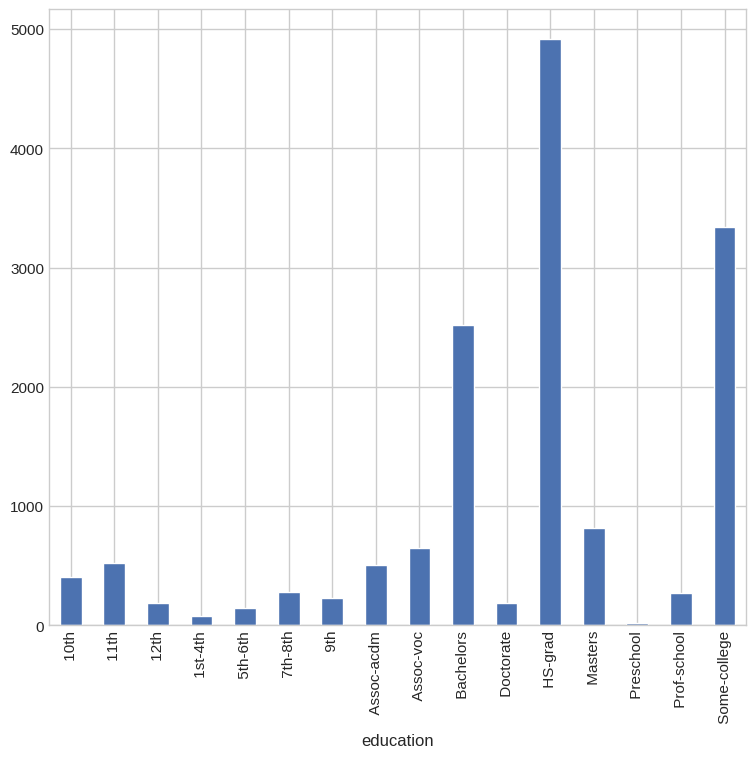

In [54]:
pd.crosstab(s_train['Salary'],s_train['education']).mean().plot(kind='bar')

<Axes: xlabel='occupation'>

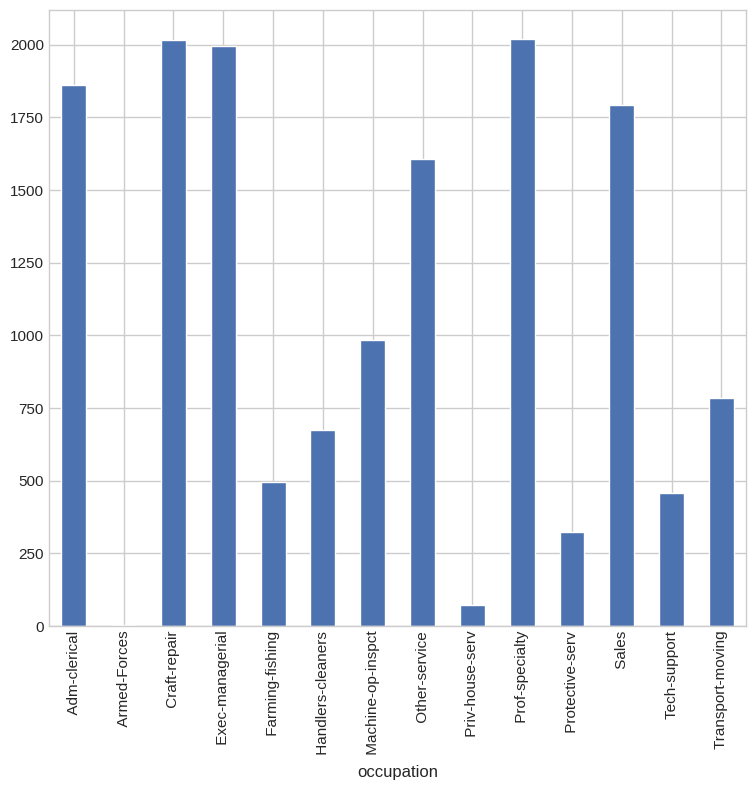

In [55]:
pd.crosstab(s_train['Salary'],s_train['occupation']).mean().plot(kind='bar')

<Axes: xlabel='workclass'>

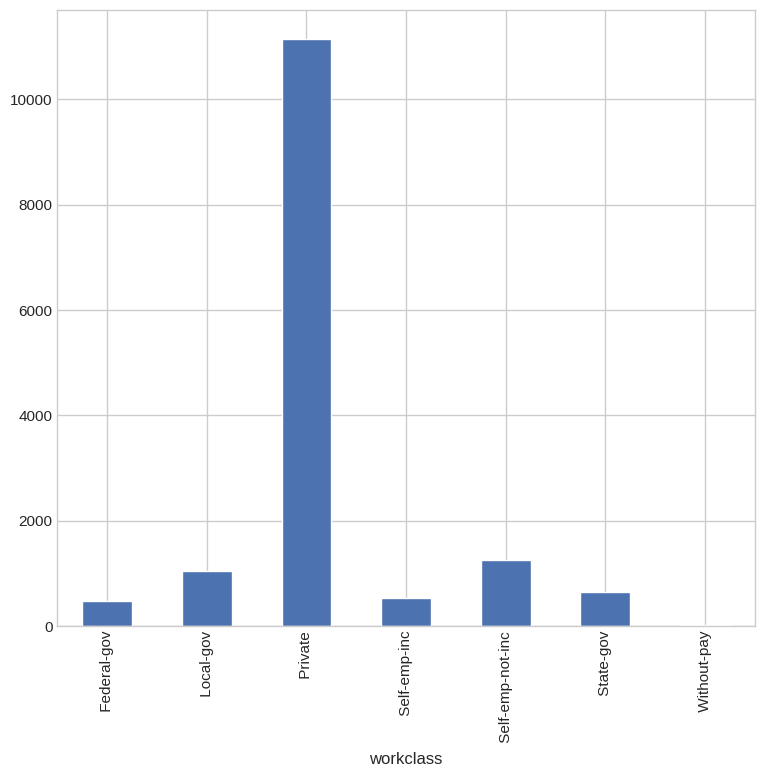

In [56]:
pd.crosstab(s_train['Salary'],s_train['workclass']).mean().plot(kind='bar')

<Axes: xlabel='sex'>

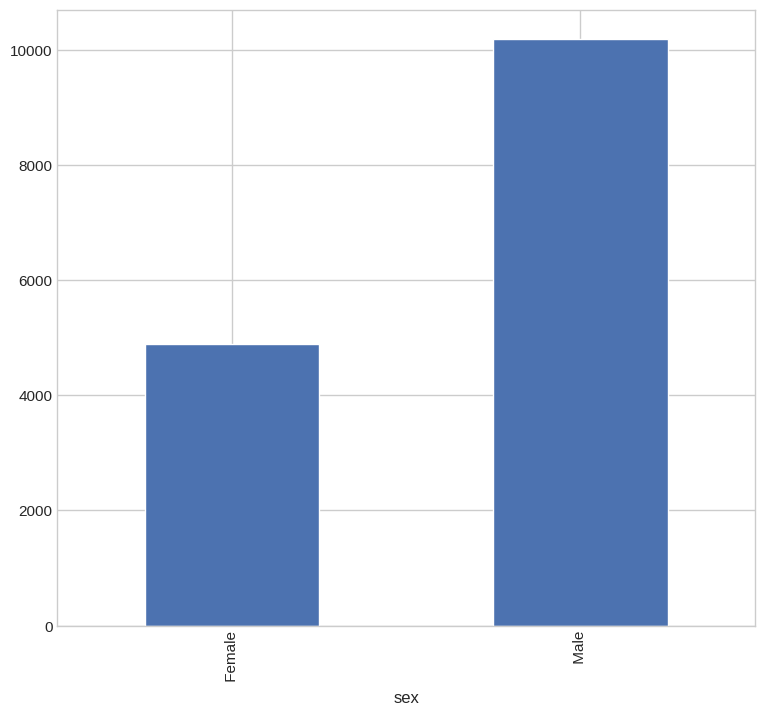

In [57]:
pd.crosstab(s_train['Salary'],s_train['sex']).mean().plot(kind='bar')

<Axes: xlabel='relationship'>

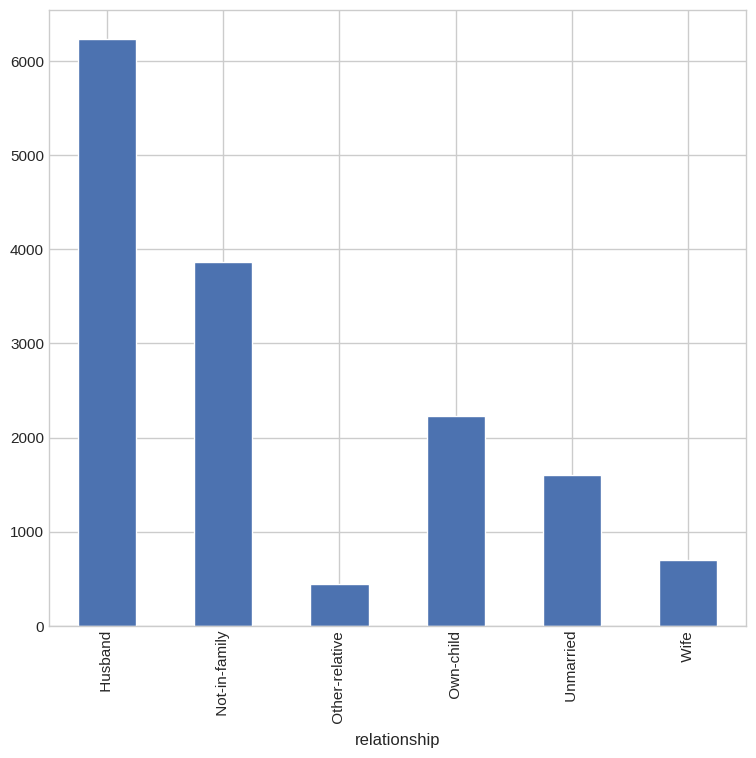

In [58]:
pd.crosstab(s_train['Salary'],s_train['relationship']).mean().plot(kind='bar')

In [59]:
#Number of labels: cardinality
# check for cardinality in categorical variables

for var in categorical:

    print(var, ' contains ', len(s_train[var].unique()), ' labels')

workclass  contains  7  labels
education  contains  16  labels
maritalstatus  contains  7  labels
occupation  contains  14  labels
relationship  contains  6  labels
race  contains  5  labels
sex  contains  2  labels
native  contains  40  labels
Salary  contains  2  labels


In [60]:
#Feature encoding

from sklearn.preprocessing import LabelEncoder
s_train = s_train.apply(LabelEncoder().fit_transform)
s_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,22,5,9,12,4,0,1,4,1,24,0,39,37,0
1,33,4,9,12,2,3,0,4,1,0,0,12,37,0
2,21,2,11,8,0,5,1,4,1,0,0,39,37,0
3,36,2,1,6,2,5,0,2,1,0,0,39,37,0
4,11,2,9,12,2,9,5,2,0,0,0,39,4,0


In [61]:
s_test = s_test.apply(LabelEncoder().fit_transform)
s_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,8,2,1,6,4,6,3,2,1,0,0,39,37,0
1,21,2,11,8,2,4,0,4,1,0,0,49,37,0
2,11,1,7,11,2,10,0,4,1,0,0,39,37,1
3,27,2,15,9,2,6,0,2,1,87,0,39,37,1
4,17,2,0,5,4,7,1,4,1,0,0,29,37,0


In [62]:
#Declare feature vector and target variable

X = s_train.drop(['Salary'], axis=1)

y = s_train['Salary']

In [63]:
#Split data into separate training and test set
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [64]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((21112, 13), (9049, 13))

In [65]:
#Feature Engineering


In [66]:
X_train.dtypes

age              int64
workclass        int64
education        int64
educationno      int64
maritalstatus    int64
occupation       int64
relationship     int64
race             int64
sex              int64
capitalgain      int64
capitalloss      int64
hoursperweek     int64
native           int64
dtype: object

In [67]:
X_test.dtypes

age              int64
workclass        int64
education        int64
educationno      int64
maritalstatus    int64
occupation       int64
relationship     int64
race             int64
sex              int64
capitalgain      int64
capitalloss      int64
hoursperweek     int64
native           int64
dtype: object

In [68]:
# display categorical variables

categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

[]

In [69]:
# display numerical variables

numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['age',
 'workclass',
 'education',
 'educationno',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capitalgain',
 'capitalloss',
 'hoursperweek',
 'native']

In [70]:
# print percentage of missing values in the categorical variables in training set

X_train[categorical].isnull().mean()

Series([], dtype: float64)

In [71]:
# print categorical variables with missing data

for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, (X_train[col].isnull().mean()))

In [72]:
# impute missing categorical variables with most frequent value

for df2 in [X_train, X_test]:
    df2['workclass'].fillna(X_train['workclass'].mode()[0], inplace=True)
    df2['occupation'].fillna(X_train['occupation'].mode()[0], inplace=True)
    df2['native'].fillna(X_train['native'].mode()[0], inplace=True)

In [73]:
# check missing values in categorical variables in X_train

X_train[categorical].isnull().sum()

Series([], dtype: float64)

In [74]:
# check missing values in categorical variables in X_test

X_test[categorical].isnull().sum()

Series([], dtype: float64)

In [75]:
# check missing values in X_train

X_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
dtype: int64

In [76]:
# check missing values in X_test

X_test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
dtype: int64

In [77]:
#Encode categorical variables
# print categorical variables

categorical

[]

In [78]:
X_train[categorical].head()

""
8166
7138
437
5436
6541


In [79]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 899.6 kB/s eta 0:00:00


In [80]:
# import category encoders

import category_encoders as ce

In [81]:
# encode remaining variables with one-hot encoding

encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'maritalstatus', 'occupation', 'relationship',
                                 'race', 'sex', 'native'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [82]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40
8166,37,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7138,4,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
437,13,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5436,25,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6541,20,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [83]:
X_train.shape

(21112, 102)

In [84]:
X_test.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40
25338,4,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
18840,4,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8391,39,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18258,26,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
16669,36,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [85]:
X_test.shape

(9049, 102)

We now have training and testing set ready for model building. Before that, we should map all the feature variables onto the same scale. It is called feature scaling.

Feature Scaling

In [86]:
cols = X_train.columns

In [87]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [88]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [89]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [90]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40
0,0.894737,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.842105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.368421,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.263158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


now have X_train dataset ready to be fed into the Gaussian Naive Bayes classifier.

###Model training

In [91]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

###Predict the results

In [92]:
y_pred = gnb.predict(X_test)

y_pred

array([0, 0, 1, ..., 0, 1, 1])

In [93]:
#Check accuracy score

from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.5843


y_test are the true class labels and y_pred are the predicted class labels in the test-set.

In [94]:
#Compare the train-set and test-set accuracy

y_pred_train = gnb.predict(X_train)

y_pred_train

array([1, 0, 1, ..., 1, 1, 1])

In [95]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.5834


In [96]:
#Check for overfitting and underfitting
# print the scores on training and test set



print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.5834
Test set score: 0.5843


 These two values are quite comparable. So, there is no sign of overfitting

In [97]:
#Compare model accuracy with null accuracy

# check class distribution in test set

y_test.value_counts()

0    6798
1    2251
Name: Salary, dtype: int64

0 -- <=50k

1 -- >50K

In [98]:
# check null accuracy score

null_accuracy = (7407/(7407+2362))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7582


In [99]:
##Confusion matrix
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[3185 3613]
 [ 149 2102]]

True Positives(TP) =  3185

True Negatives(TN) =  2102

False Positives(FP) =  3613

False Negatives(FN) =  149


<Axes: >

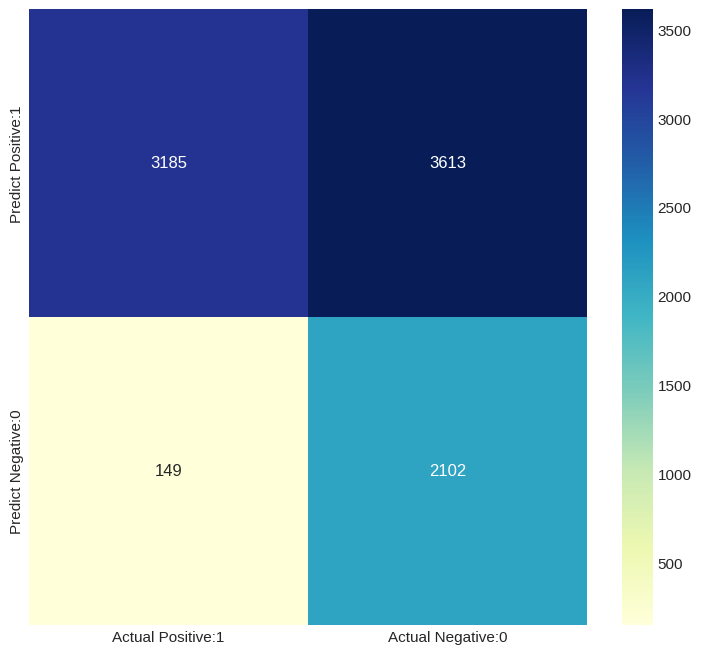

In [100]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

Classification metrices

In [101]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.47      0.63      6798
           1       0.37      0.93      0.53      2251

    accuracy                           0.58      9049
   macro avg       0.66      0.70      0.58      9049
weighted avg       0.81      0.58      0.60      9049



Classification accuracy

In [102]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [103]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.5843


Classification error

In [104]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.4157


In [105]:
#Precision
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.4685


In [106]:
#Recall
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9553


In [107]:
#False Positive Rate
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.6322


In [108]:
#Specificity
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.3678


In [109]:
#Calculate class probabilities
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = gnb.predict_proba(X_test)[0:10]

y_pred_prob

array([[1.00000000e+000, 8.52729343e-067],
       [9.99999999e-001, 1.00916793e-009],
       [3.07670259e-015, 1.00000000e+000],
       [9.99982200e-001, 1.77995807e-005],
       [9.99980406e-001, 1.95941018e-005],
       [2.10882463e-011, 1.00000000e+000],
       [5.36984725e-029, 1.00000000e+000],
       [7.37631295e-055, 1.00000000e+000],
       [3.95682248e-195, 1.00000000e+000],
       [8.77691545e-001, 1.22308455e-001]])

In each row, the numbers sum to 1.

There are 2 columns which correspond to 2 classes - <=50K and >50K.

  * Class 0 => <=50K - Class that a person makes less than equal to 50K.

  * Class 1 => >50K - Class that a person makes more than 50K.

Importance of predicted probabilities

We can rank the observations by probability of whether a person makes less than or equal to 50K or more than 50K.
predict_proba process

Predicts the probabilities

Choose the class with the highest probability

Classification threshold level

There is a classification threshold level of 0.5.

Class 0 => <=50K - probability of salary less than or equal to 50K is predicted if probability < 0.5.

Class 1 => >50K - probability of salary more than 50K is predicted if probability > 0.5.

In [110]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - <=50K', 'Prob of - >50K'])

y_pred_prob_df

,Prob of - <=50K,Prob of - >50K
0,1.000000e+00,8.527293e-67
1,1.000000e+00,1.009168e-09
2,3.076703e-15,1.000000e+00
3,9.999822e-01,1.779958e-05
4,9.999804e-01,1.959410e-05
5,2.108825e-11,1.000000e+00
6,5.369847e-29,1.000000e+00
7,7.376313e-55,1.000000e+00
8,3.956822e-195,1.000000e+00
9,8.776915e-01,1.223085e-01


In [111]:
# print the first 10 predicted probabilities for class 1 - Probability of >50K

gnb.predict_proba(X_test)[0:10, 1]

array([8.52729343e-67, 1.00916793e-09, 1.00000000e+00, 1.77995807e-05,
       1.95941018e-05, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.22308455e-01])

In [112]:
# store the predicted probabilities for class 1 - Probability of >50K

y_pred1 = gnb.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

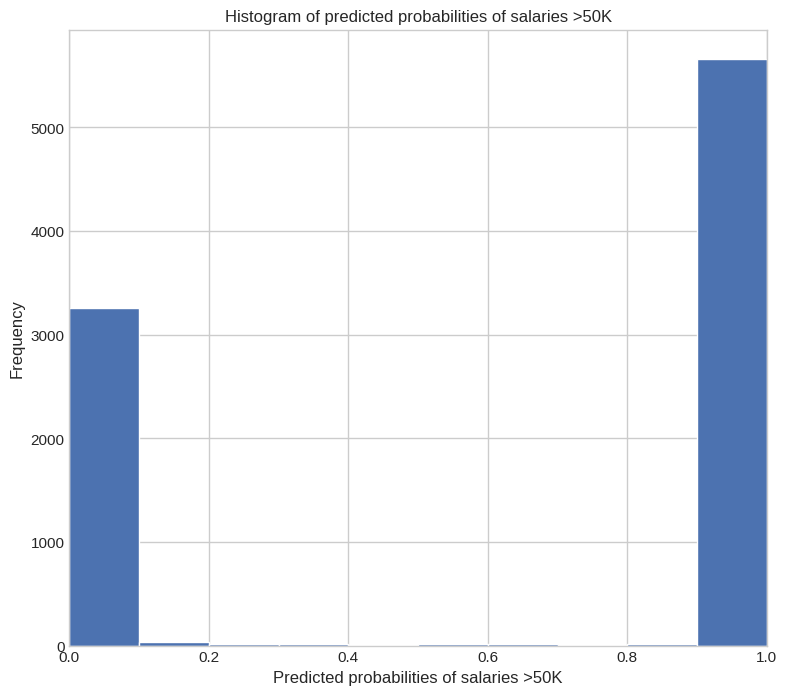

In [113]:
# plot histogram of predicted probabilities


# adjust the font size
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of salaries >50K')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of salaries >50K')
plt.ylabel('Frequency')

ROC - AUC

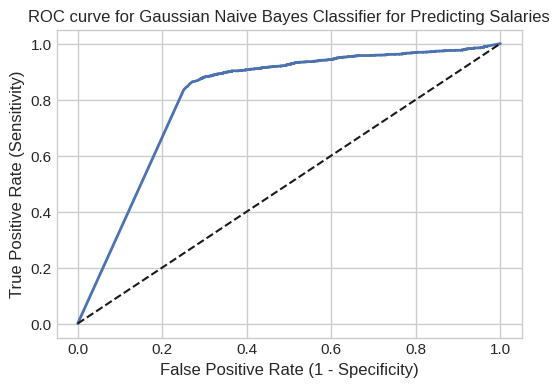

In [120]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = 1)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Gaussian Naive Bayes Classifier for Predicting Salaries')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [121]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8092


In [122]:
#Interpretation
# calculate cross-validated ROC AUC

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(gnb, X_train, y_train, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.7899


In [123]:
#k-Fold Cross Validation
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(gnb, X_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.58001894 0.55066288 0.57460919 0.57934628 0.56039792 0.56560872
 0.56371388 0.57697774 0.58645192 0.58124112]


In [124]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.5719
